https://huggingface.co/nlpconnect/vit-gpt2-image-captioning

In [1]:

from transformers import pipeline

image_to_text = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

image_to_text("https://ankur3107.github.io/assets/images/image-captioning-example.png")

# [{'generated_text': 'a soccer game with a player jumping to catch the ball '}]


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
C:\Users\kewa9\anaconda3\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
C:\Users\kewa9\anaconda3\lib\site-packages\transformers\generation\utils.py:1254: UserWarning: Using the model-agnostic default `max_length` (=20) to control thegeneration length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bo

[{'generated_text': 'a soccer game with a player jumping to catch the ball '}]

In [2]:
import os
directory = os.getcwd()
image_to_text(directory+"\\test.jpeg")

[{'generated_text': 'a bear is sitting in the water with a toy '}]

In [3]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image

model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds


predict_step(['test.jpeg']) 

['a bear in a pool of water with a fish in its mouth']

In [4]:
from transformers import pipeline
import requests

url = "https://i.imgur.com/2lnWoly.jpg"
image = Image.open(requests.get(url, stream=True).raw)

obj_detector = pipeline("object-detection", model="devonho/detr-resnet-50_finetuned_cppe5")
obj_detector(image)

C:\Users\kewa9\anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\kewa9\anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


C:\Users\kewa9\anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kewa9\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of the model checkpoint at devonho/detr-resnet-50_finetuned_cppe5 were not used when initializing DetrForObjectDetection: ['model.backbo

[{'score': 0.9543033242225647,
  'label': 'Mask',
  'box': {'xmin': 409, 'ymin': 134, 'xmax': 527, 'ymax': 228}}]

In [7]:
obj_detector('test.jpeg')

[]

In [5]:
#pip install --upgrade google-cloud-vision
#pip install timm

In [6]:
def detect_labels(path):
    """Detects labels in the file."""
    from google.cloud import vision

    client = vision.ImageAnnotatorClient()

    with open(path, "rb") as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.label_detection(image=image)
    labels = response.label_annotations
    print("Labels:")

    for label in labels:
        print(label.description)

    if response.error.message:
        raise Exception(
            "{}\nFor more info on error messages, check: "
            "https://cloud.google.com/apis/design/errors".format(response.error.message)
        )
detect_labels('test.jpeg')

DefaultCredentialsError: Your default credentials were not found. To set up Application Default Credentials, see https://cloud.google.com/docs/authentication/external/set-up-adc for more information.

In [9]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-cls.pt')  # load an official model

# Predict with the model
results = model('https://ultralytics.com/images/bus.jpg')  # predict on an image


  0%|          | 0.00/476k [00:00<?, ?B/s]

image 1/1 C:\Users\kewa9\Desktop\Course\CSC2125 MLE\csc2125_assignment1\bus.jpg: 224x224 minibus 0.43, police_van 0.29, ambulance 0.06, recreational_vehicle 0.04, bullet_train 0.03, 9.0ms
Speed: 4.0ms preprocess, 9.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


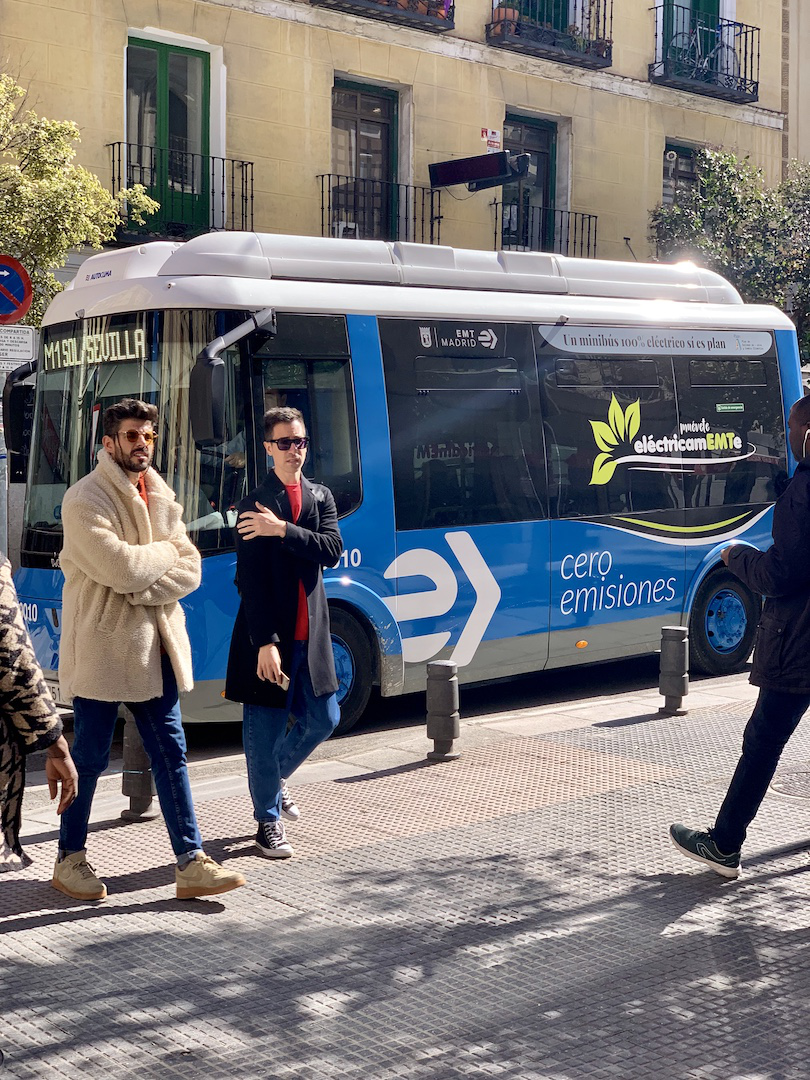

In [10]:
url = 'https://ultralytics.com/images/bus.jpg'
image = Image.open(requests.get(url, stream=True).raw)
image

In [13]:
for id in results[0].probs.top5:
    print(results[0].names[id])

minibus
police_van
ambulance
recreational_vehicle
bullet_train
